<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df=pd.read_csv('fish_weight_predict.csv')
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.isnull().sum()

Species     0
Weight      0
V_length    0
D_length    0
C_length    0
Height      0
Width       0
dtype: int64

Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species     159 non-null object
Weight      159 non-null float64
V_length    159 non-null float64
D_length    159 non-null float64
C_length    159 non-null float64
Height      159 non-null float64
Width       159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,V_length,D_length,C_length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,399.269811,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.118564,9.996441,10.716328,11.610246,4.286208,1.685804
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
df['Species'].nunique()

7

In [8]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
species_dummy=pd.get_dummies(df["Species"],drop_first=True)
species_dummy

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
154,0,0,0,0,1,0
155,0,0,0,0,1,0
156,0,0,0,0,1,0
157,0,0,0,0,1,0


In [10]:
df['Species']=pd.get_dummies(data = df['Species'],drop_first=True)
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
x=df.drop('Weight',axis=1)
y=df['Weight']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.89e-69
Time:                        20:27:38   Log-Likelihood:                -986.06
No. Observations:                 159   AIC:                             1986.
Df Residuals:                     152   BIC:                             2008.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.2746     31.627    -15.154      0.000    -541.759    -416.790
Species      -64.5506     43.688     -1.478      0.142    -150.865      21.763
V_length      74.0702     40.444      1.831      0.069      -5.835     153.975
D_length      -8.1319     41.404     -0.196      0.845     -89.933      73.670
C_length     -38.0364     18.466     -2.060      0.041     -74.520      -1.553
Height        34.2871      9.666      3.547      0.001      15.191      53.383
Width         11.3470     21.784      0.521      0.603     -31.692      54.386
==============================================================================
Omnibus:                       23.381   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.752
Skew:                           0.795   Prob(JB):                     2.84e-08
Kurtosis:                       4.648   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS=0<0.05,HENCE MODEL IS SIGNIFICANCE WE CAN USE THIS MODEL.R_SQUARE=0.887<1 WHICH MEANS MODEL IS FIT

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2)
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training dataset: ", rmse_train)
# for testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test dataset: ", rmse_test)
r_square = MLR_model.score(X_train, y_train)
adj_r_square = 1-((1-r_square)*(172)/(173-16-1))
print("The R-Squared value is : ", r_square)
print("The Adjusted R-Squared value is : ", adj_r_square)

Root Mean Squared Error (RMSE) on training dataset:  118.4509
Root Mean Squared Error (RMSE) on test dataset:  128.1068
The R-Squared value is :  0.8875423119367104
The Adjusted R-Squared value is :  0.8760081900840653


As there is no difference(neglible Difference) between RMSE Train and Test Dataset we can say that there is no "Overfitting"

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,[1,-1]]
vif_scores(df1)

,Independent Features,VIF Scores
0,Weight,5.667592
1,Width,5.667592


###### INFERENCE:-Variance Inflation Factors of Both Weight And Width Are More Than 1,Hence HIGH MultiCollinearity

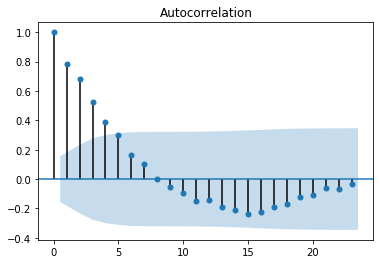

In [14]:
model_residuals=model.resid
sm.graphics.tsa.plot_acf(x=model_residuals)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

# Use Ridge() to perform ridge regression
# 'Alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 1.5)
ridge_model = ridge.fit(X_train, y_train)
train_pred = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training dataset: ", rmse_train)
# for testing set:
test_pred = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test dataset: ", rmse_test)

Root Mean Squared Error (RMSE) on training dataset:  0.3319
Root Mean Squared Error (RMSE) on test dataset:  0.3592


#OLS
Root Mean Squared Error (RMSE) on training set:  0.3337
Root Mean Squared Error (RMSE) on test set:  0.3626
  
#Ridge regression
Root Mean Squared Error (RMSE) on training set:  0.3383
Root Mean Squared Error (RMSE) on test set:  0.3651    

RMSE on test set FROM OLS regression(0.3337) is Less than RMSE on test dataset FROM Ridge regression(0.3651).Hence We Can go with Ridge Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
lr=LinearRegression()
MLR_model =lr.fit(X_train,y_train)
lin_pred=model.predict(X_train)
lin_pred

111    706.995215
131    542.424024
58     529.239992
102    417.313955
47     212.285412
          ...    
133    579.109950
137    734.184908
72    -238.385260
140    958.170122
37      81.830323
Length: 127, dtype: float64

In [17]:
# type your code here
sgd = SGDRegressor(random_state =1)
lin_reg = sgd.fit(X_train,y_train)
sgd_pred = lin_reg.predict(X_train)

In [18]:
sgd_pred

array([-9.42587120e+11, -8.58481177e+11, -7.79948786e+11, -6.94944553e+11,
       -5.48323910e+11, -4.45353970e+11, -7.56959235e+11, -5.93626043e+11,
       -8.86922868e+11, -8.69675059e+11, -6.58111071e+11, -3.03664688e+11,
       -5.38808632e+11, -8.94736617e+11, -4.03586817e+11, -6.54684333e+11,
       -6.28112552e+11, -9.12120652e+11, -1.00646152e+12, -5.85534599e+11,
       -4.57104723e+11, -3.70585197e+11, -5.86311216e+11, -4.63830272e+11,
       -5.80212569e+11, -5.30365946e+11, -5.26436480e+11, -5.67093514e+11,
       -5.15347759e+11, -1.30262676e+12, -4.87863163e+11, -4.14455933e+11,
       -1.09953751e+12, -2.68984690e+11, -2.87696454e+11, -2.60106065e+11,
       -9.66067998e+11, -4.88089689e+11, -9.80058334e+11, -9.22814506e+11,
       -5.42061044e+11, -4.48682366e+11, -9.77235934e+11, -4.02065130e+11,
       -5.78360171e+11, -5.04627142e+11, -5.25917565e+11, -5.09379422e+11,
       -3.12295054e+11, -3.83227381e+11, -1.05043610e+12, -5.93132327e+11,
       -7.15957892e+11, -

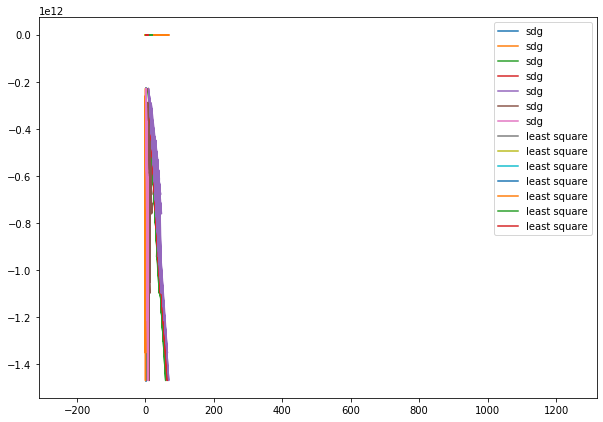

In [19]:
plt.figure(figsize = (10,7))
plt.barh(y=sgd_pred,width=lin_pred)
plt.plot(X_train, sgd_pred, label = 'sdg')
plt.plot(X_train, lin_pred, label = 'least square')
plt.legend(loc = 'upper right')
plt.show()

Fits for both the models OLS and SGD are Same and Not different

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# Create a dataframe to store the variables and their corresponding coefficient
# pass the dictionary as data to the dataframe 
# 'coef_' returns the value of each coefficient
df_features = df.drop(['Species','Weight'],axis=1)
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient':df_features})
# print the variables having the coefficient equal to zero 
# 'to_list()' converts the output to the list type
print("Least significant variables obtained from lasso Regression when alpha is 1",
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

Least significant variables obtained from lasso Regression when alpha is 1 []


THERE IS NO Least significant variables WHEN WE USED lasso Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
x=df['Width']
y=df['Weight']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     579.0
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.52e-54
Time:                        20:27:39   Log-Likelihood:                -1036.9
No. Observations:                 159   AIC:                             2078.
Df Residuals:                     157   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -430.7425     36.904    -11.672      0.000    -503.636    -357.849
Width        187.8925      7.808     24.063      0.000     172.470     203.315
==============================================================================
Omnibus:                      100.078   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.292
Skew:                           2.298   Prob(JB):                    1.12e-138
Kurtosis:                      11.647   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS=0<0.05,HENCE MODEL IS SIGNIFICANCE WE CAN USE THIS MODEL.R_SQUARE=0.787<1 WHICH MEANS MODEL IS FIT

Variable Width per unit Change Increases 187.8925 unit Change in Weight of Fish

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [22]:
#Grid Search 5-fold cross validation:-

# 'alpha' assigns the regularization strength to the model
tuned_parameters = [{'alpha':[0.00001, 0.001, 0.1, 10, 100]}]
# instantiate of Ridge() method
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge,
 param_grid = tuned_parameters,
 cv = 5)
# fit the model on X_trian and y_train using fit()
ridge_grid.fit(X_train, y_train)
print("Best parameters for the Ridge Regression: ", ridge_grid.best_params_,'\n')


Best parameters for the Ridge Regression:  {'alpha': 10} 



In [23]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 10)
Ridge_model = Ridge.fit(X_train, y_train)
train_pred = Ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = Ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set with Alpha=10 is: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3333
Root Mean Squared Error (RMSE) on test set with Alpha=10 is:  0.3575


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [24]:
# type your code here
from sklearn.linear_model import ElasticNet

tuned_parameters = [{'alpha':[7,8,9,10,11]}]
ElasticNet = ElasticNet()

ElasticNet_grid = GridSearchCV(estimator = ElasticNet,
 param_grid = tuned_parameters,
 cv = 5)
# fit the model on X_trian and y_train using fit()
ElasticNet_grid.fit(X_train, y_train)
print("Best parameters for the ElasticNet Regression: ", ElasticNet_grid.best_params_,'\n')

Best parameters for the ElasticNet Regression:  {'alpha': 7} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [25]:
# type your code here
X =df.drop('Weight',axis=1)
y =df['Weight'] 
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 110, test_size=0.2)

#Grid Search 5-fold cross validation:-

# 'alpha' assigns the regularization strength to the model
tuned_parameters = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}]
# instantiate of Ridge() method
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso,
 param_grid = tuned_parameters,
 cv = 5)
# fit the model on X_trian and y_train using fit()
lasso_grid.fit(X_train, y_train)
print("Best parameters for the lasso Regression: ", lasso_grid.best_params_,'\n')

Best parameters for the lasso Regression:  {'alpha': 0.0001} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
X =df.drop('Weight',axis=1)
y =df['Weight'] 

X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)



from sklearn.linear_model import ElasticNet
tuned_parameters = [{'l1_ratio' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]
enet = ElasticNet(alpha = 0.1)
enet_grid = GridSearchCV(estimator = enet,param_grid = tuned_parameters,cv=5)
enet_grid.fit(X_train, y_train)
print("Best parameters for the Elastic Net Regression: ", enet_grid.best_params_)


Best parameters for the Elastic Net Regression:  {'l1_ratio': 0.001}


In [27]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet(alpha = 0.1)
ElasticNet_model = ElasticNet.fit(X_train, y_train)
train_pred = ElasticNet_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = ElasticNet_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set with alpha=0.1 is: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3459
Root Mean Squared Error (RMSE) on test set with alpha=0.1 is:  0.3839
